<a href="https://colab.research.google.com/github/sipocz/Colab/blob/main/EarthQuaqe_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#EarthQuake
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import sweetviz as sw

!pip install sweetviz
import sweetviz as sw


Mounted at /content/drive
     |████████████████████████████████| 15.1MB 315kB/s 
     |████████████████████████████████| 71kB 7.4MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [4]:
df=pd.read_csv("/content/drive/My Drive/001_AI/_EarthQuake/features_a.csv")
df_clasters=pd.read_csv("/content/drive/My Drive/001_AI/_EarthQuake/train_labels.csv")

In [5]:
Y=df_clasters[["damage_grade"]]
X=df

In [6]:
len(X.columns)


X=X[:10000]
Y=Y[:10000]

In [7]:
from sklearn.linear_model import Lasso
alpha=0.000001
lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e6)
lassoreg.fit(X,Y)
lassopred = lassoreg.predict(X)


In [ ]:
df.columns

In [8]:
from sklearn.preprocessing import StandardScaler
# Separating out the features
X
# Separating out the target
Y
# Standardizing the features
X = StandardScaler().fit_transform(X)

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['p1', 'p2', 'p3'])

In [10]:
principalDf.head()

,p1,p2,p3
0,-1.113683,1.692168,-0.210449
1,-0.735348,0.349349,-1.203386
2,-0.688131,0.276134,-0.315176
3,-1.193469,-1.354250,1.065743
4,-0.202691,1.406292,1.001750


In [11]:
Y[["damage_grade"]]

,damage_grade
0,3
1,2
2,3
3,2
4,3
...,...
9995,2
9996,2
9997,3
9998,2


In [ ]:
Y

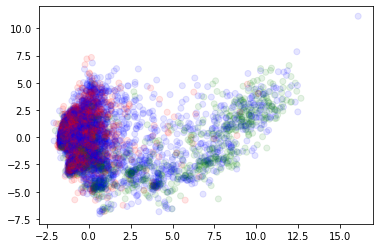

In [12]:
color=["","green","blue","red"]
colorl=[color[i] for i in list(Y["damage_grade"])]
plt.scatter(principalDf[["p1"]],principalDf[["p2"]], c=colorl, alpha=0.1)

In [13]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import Birch
from sklearn.cluster import MeanShift
import sklearn.cluster as cluster


from sklearn.decomposition import PCA

In [14]:
n_cluster_num=3
df_feature=X
clusterer = KMeans(n_clusters=n_cluster_num, random_state=10)
cluster_labels_Kmeans = clusterer.fit_predict(df_feature)



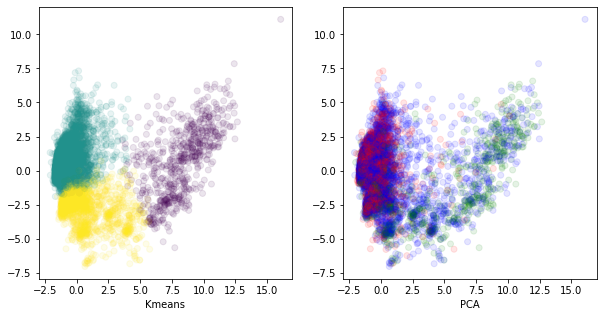

In [15]:
# Kezdjünk új ábrát (plt.figure)!
plt.figure(figsize=(10,5))
# Rajzoljunk a plt.scatter segítségével!
# Segítség: X_pca[:, 0], X_pca[:, 1], c=Y
plt.subplot(121)
plt.xlabel("Kmeans")
plt.scatter(principalDf[["p1"]],principalDf[["p2"]],c=cluster_labels_Kmeans,alpha=0.1)
plt.subplot(122)
plt.xlabel("PCA")
plt.scatter(principalDf[["p1"]],principalDf[["p2"]], c=colorl, alpha=0.1)

# Állítsuk be a tengelyek címkéit és a címet!

plt.show()

In [16]:
cluster_labels_Kmeans=[]

In [78]:
clusterer=DBSCAN(eps=0.395)
cluster_label_DBScan=clusterer.fit_predict(df_feature)
print(set(cluster_label_DBScan))


{0, 1, 2, -1}


In [86]:
color=["","green","blue","red"]
colorpca=[color[i] for i in list(Y["damage_grade"])]

color2=["red","green","blue","red"]

colordbs=[color2[i] for i in list(Y["damage_grade"])]


{0, 1, 2, -1}


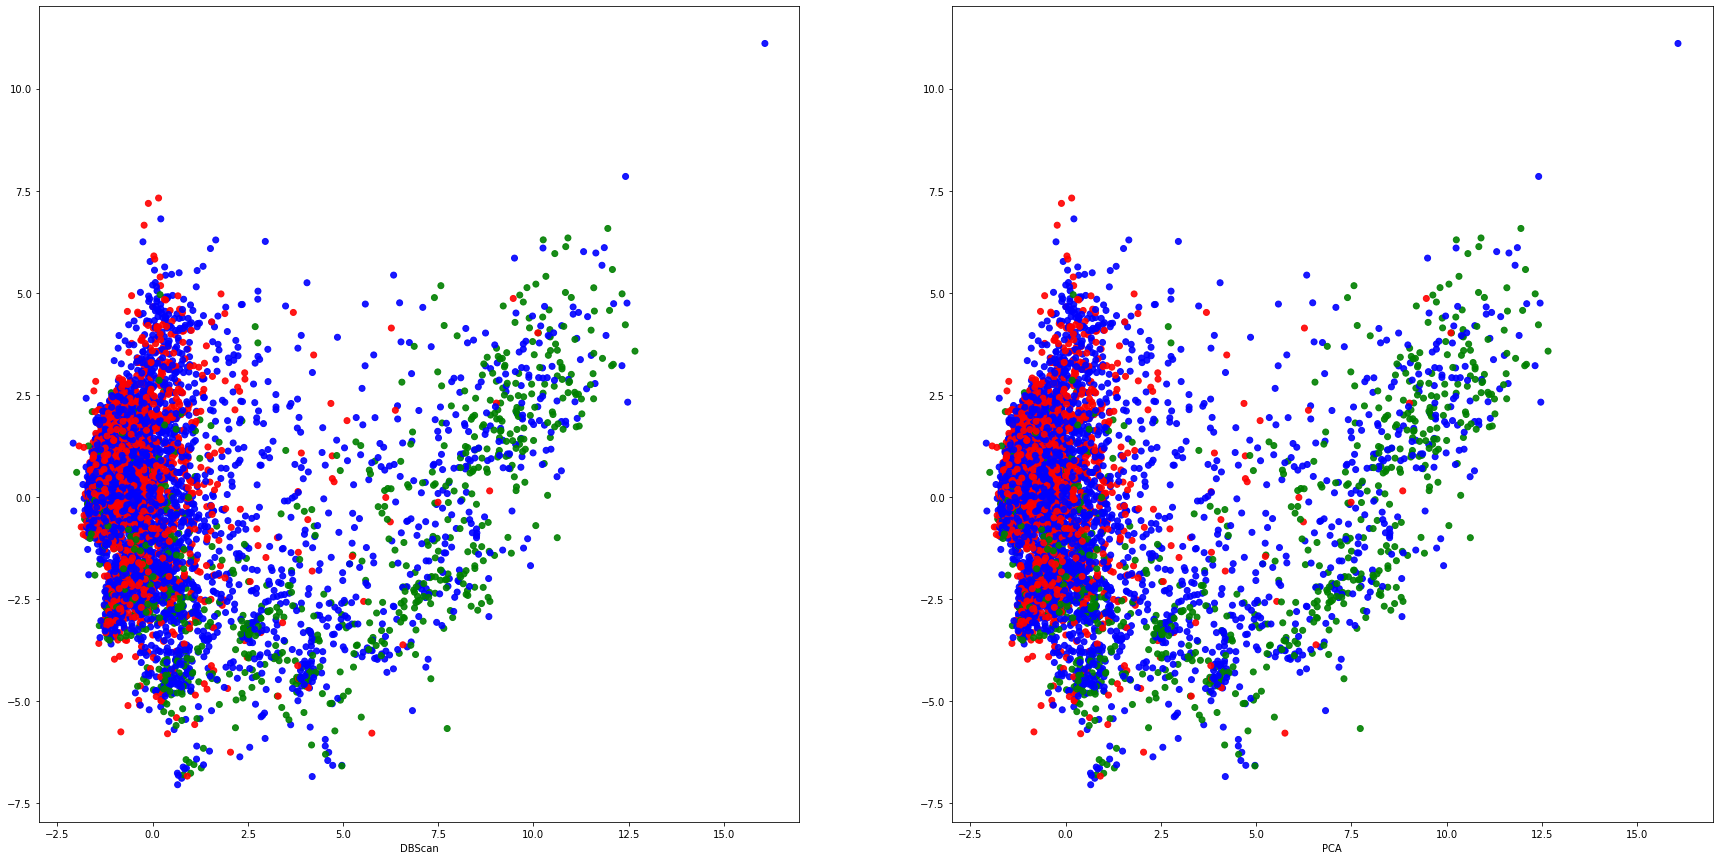

In [95]:



clusterer=DBSCAN(eps=0.392)
cluster_label_DBScan=clusterer.fit_predict(df_feature)
print(set(cluster_label_DBScan))

color=["","green","blue","red"]
colorpca=[color[i] for i in list(Y["damage_grade"])]

color2=["red","green","blue","red"]

colordbs=[color2[i] for i in list(Y["damage_grade"])]

# Kezdjünk új ábrát (plt.figure)!
plt.figure(figsize=(30,15))
# Rajzoljunk a plt.scatter segítségével!
# Segítség: X_pca[:, 0], X_pca[:, 1], c=Y
plt.subplot(121)
plt.xlabel("DBScan")

plt.scatter(principalDf[["p1"]],principalDf[["p2"]],c=colordbs,alpha=0.9)
plt.subplot(122)
plt.xlabel("PCA")
plt.scatter(principalDf[["p1"]],principalDf[["p2"]], c=colorpca, alpha=0.9)

# Állítsuk be a tengelyek címkéit és a címet!

plt.show()